<a href="https://colab.research.google.com/github/rachitkinger/e2e_ml_sklearn/blob/main/probability_distributions_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions  



### Downloading data

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
%matplotlib inline
import plotnine
import statsmodels.api as sm

Copy the `kaggle.json` api token (stored in a separate place or download a fresh one from Kaggle/Account/APIs) in `/root/.kaggle` on Colab. Remember to check the icon to 'Show Hidden Files'. Use the GUI to upload the file from desktop.  

In [4]:
! kaggle datasets download -d mukeshkumar95/national-survey-of-family-growthnsfg

  0% 0.00/157k [00:00<?, ?B/s]
100% 157k/157k [00:00<00:00, 77.6MB/s]


In [5]:
import zipfile
with zipfile.ZipFile('/content/national-survey-of-family-growthnsfg.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
nsfg = pd.read_hdf("/content/nsfg.hdf5", "nsfg")
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [7]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.


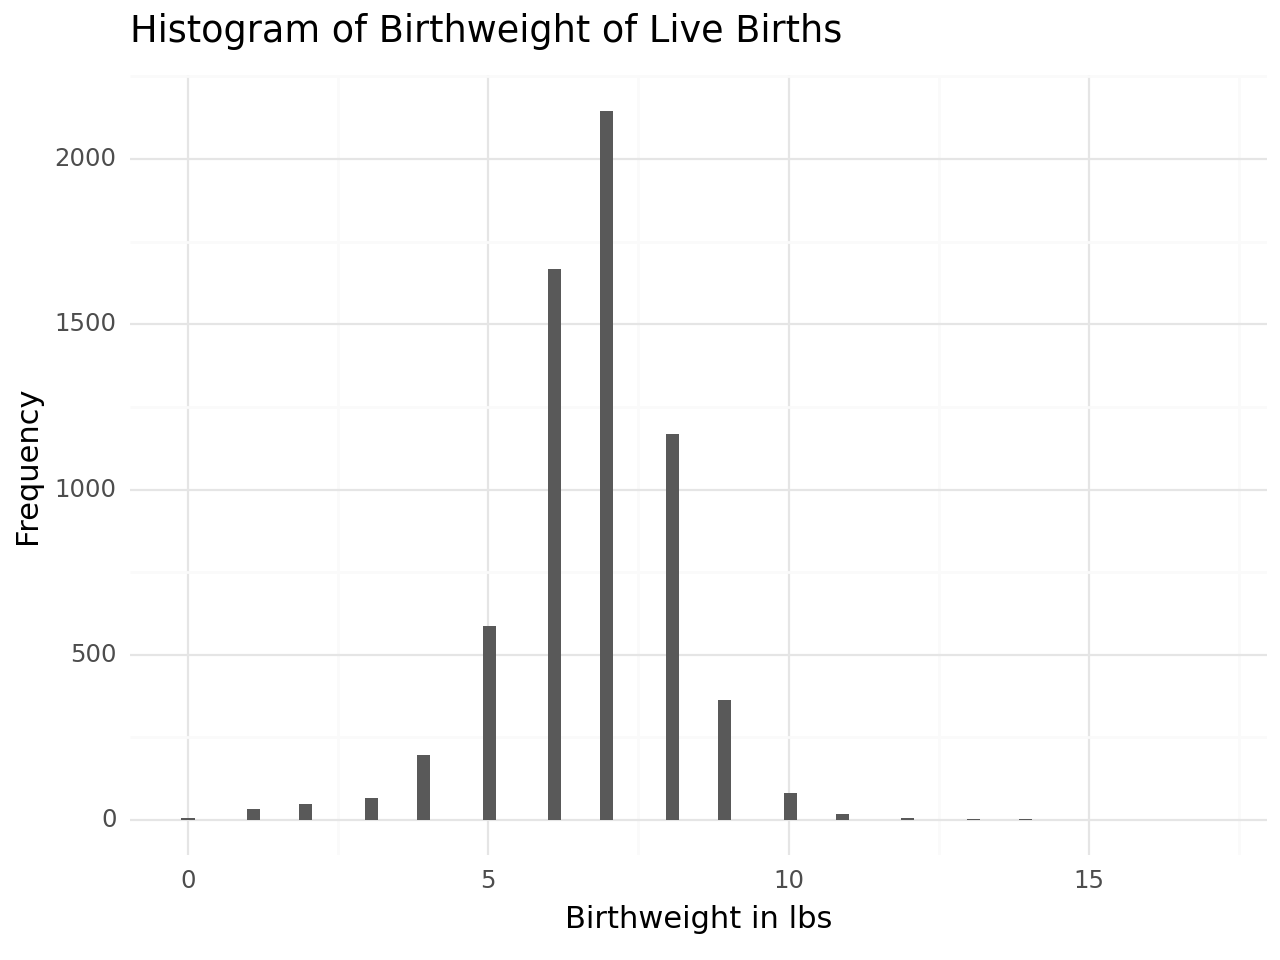

<Figure Size: (640 x 480)>

In [20]:
from plotnine import (ggplot, aes,
                      geom_col, geom_bar, geom_point, geom_density, geom_histogram,
                      ggtitle, xlab, ylab, labs,
                      theme_minimal)
(
    ggplot(nsfg[(nsfg.birthwgt_lb1 < 75) & (nsfg.outcome == 1)]) # ruling out an outlier & only live births
    + aes("birthwgt_lb1")
    + geom_histogram()
    + ggtitle("Histogram of Birthweight of Live Births")
    + xlab("Birthweight in lbs")
    + ylab("Frequency")
    + theme_minimal()

)

## Effect size  
Difference in means between two groups is only meaningful within the context of their variance. So if you have two groups with means $\bar x_1$, and $\bar x_2$ then the effect size is:  


$ \frac {\bar x_1 - \bar x_2} {s} $  


Where $s^2$ is their pooled variance or $s$ is pooled standard deviation.  

**$Pooled \ Variance \ (s^2) $** =
$ \frac {n_1 \times s_1 + n_2 \times s_2} {n_1 + n_2} $   

Where:  
$n$ = sample size and  
$s$ = standard deviation of each sample  

## A simple example of an comparison of means of two populations
#### AB Test example (Binomal ~ Normal)    

A website has two versions of an advertisement: one with a blue background and one with a red background. You want to determine which version is more effective at getting users to click on the ad. You randomly show one version to 100 users and the other version to another 100 users. The blue ad is clicked on by 30 users and the red ad is clicked on by 40 users. What is the probability that the red ad is more effective, given this data?


This can be solved using a two-proportion z-test. It is a binomial distribution which can be approximated to a normal distribution. Let's assume $\alpha  = 0.05$, our level of significance.   

$p_1$ is the probability of success on blue button  
$p_2$ is the probability of success on red button   
$p_0$ is the actual probability of success for the population. We won't actually need it but it's value is $\frac {30+40}{100} = 0.35$  
$n_1 = n_2 = 100$     
$H_0$: $p_1 = p_2$  
$H_1$: $p_1 < p_2$  

$ SE = \sqrt (\frac {p_1 * (1-p_1)}{n_1} + \frac {p_2 * (1-p_2)}{n_2} )$

$z\space score = \frac {(p_0 - p_1) - (p_0 -p_2)}{SE} = \frac {p_2 - p_1}{SE}$


In [16]:
import numpy as np
import scipy.stats as st

p1 = 30 / 100
p2 = 40 / 100
n1 = n2 = 100
se = np.sqrt( (p1*(1 -p1)/n1) + (p2*(1-p2)/n2))
z_score= (p2 - p1) / se
p_value = 1 - st.norm.cdf(z_score)

In [17]:
p_value

0.06801856405707174

Since `p_value` is > 0.05 we do not have sufficient evidence to reject $H_0$ or null hypothesis.  

### Another AB Test example   
A company has a website with a 5% conversion rate. They want to test a new design to see if it improves the conversion rate. They randomly show the new design to 100 users and the old design to another 100 users. The new design results in 10 conversions, while the old design results in 5 conversions. Is the new design statistically significant?  

We can do a comparison of proportion hypothesis test to determine if the new design has a higher conversion rate. This is a binomial distribution with chance of success = $p$ and we can use the CLT To estimate the $p$ of the new design.  

$p_0 = .05$  
$p_1 = \frac {10}{100} = 0.10$  
$n_0 = n_1 = 100$  
$SE\space pooled = \sqrt { {p_0*(1-p_0)*1/n_0} + {p_1*(1-p_1)*1/n_1}}$  

$H_0: p_0 = p_1$  
$H_1: p_0 < p_1$  
$\alpha = 0.05$  

$z\space score = \frac {p_1 - p_0}{SE\space pooled}$  

In [2]:
import numpy as np
import scipy.stats as st

p0 = 0.05
p1 = 0.10
n0 = n1 = 100
se = np.sqrt( (p0*(1-p0)*1/n0) + (p1*(1-p1)*1/n1))
z_score = (p1 - p0) / se
p_value = 1 - st.norm.cdf(z_score)
print(p_value)

0.08876492620607679


Since `p_value` is 0.08876 which is greater than 0.05 ($\alpha$) it means we do not have enough evidence to reject the null hypothesis and $p_1 = p_0$

## ISLR - Labs Linear Regression  

In [ ]:
# install islp package for datasets
!pip install ISLP

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
%matplotlib inline

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [4]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [7]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


### Logistic Regression on Loan Default dataset  

In [3]:
Default = load_data("Default")
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [11]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
Default.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [26]:
y = Default.default == "Yes"

In [27]:
y.value_counts()

False    9667
True      333
Name: default, dtype: int64

In [7]:
X = Default.drop("default", axis=1).copy()

In [8]:
X.head()

,student,balance,income
0,No,729.526495,44361.625074
1,Yes,817.180407,12106.134700
2,No,1073.549164,31767.138947
3,No,529.250605,35704.493935
4,No,785.655883,38463.495879


In [16]:
X["student_yes"] = X.student.apply(lambda x: np.where(x == "Yes", 1, 0))

In [17]:
X.drop("student", axis=1, inplace=True)

In [31]:
# add an intercept
X['intercept'] = np.ones(X.shape[0])

In [32]:
X.head()

,balance,income,student_yes,intercept
0,729.526495,44361.625074,0,1.0
1,817.180407,12106.134700,1,1.0
2,1073.549164,31767.138947,0,1.0
3,529.250605,35704.493935,0,1.0
4,785.655883,38463.495879,0,1.0


In [41]:
from sklearn.linear_model import LogisticRegression
from ISLP import confusion_table

In [33]:
glm = sm.GLM(y, X, family = sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
balance,0.005700,0.000000,24.737,0.000
income,0.000003,0.000008,0.370,0.712
student_yes,-0.646800,0.236000,-2.738,0.006
intercept,-10.869000,0.492000,-22.079,0.000


In [34]:
results.params

balance         0.005737
income          0.000003
student_yes    -0.646776
intercept     -10.869045
dtype: float64

In [35]:
results.pvalues

balance        4.331515e-135
income          7.115254e-01
student_yes     6.189022e-03
intercept      4.995494e-108
dtype: float64

In [36]:
probs = results.predict()
probs[:10]

array([1.42872392e-03, 1.12220386e-03, 9.81227155e-03, 4.41589334e-04,
       1.93550619e-03, 1.98951815e-03, 2.33376747e-03, 1.08671832e-03,
       1.63833316e-02, 2.08061706e-05])

In [38]:
labels = np.array(["No"]*len(probs))
labels[probs > 0.5] = "Yes"

In [43]:
confusion_table(labels, Default.default)

Truth,No,Ye,Yes
Predicted,,,
No,9627,0,228
Ye,40,0,105
Yes,0,0,0
